In [2]:
%matplotlib inline

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from autorank import autorank, plot_stats, create_report, latex_table

PROJECTS = ['ant-ivy', 'archiva', 'calcite', 'cayenne', 'commons-bcel', 'commons-beanutils',
            'commons-codec', 'commons-collections', 'commons-compress', 'commons-configuration',
            'commons-dbcp', 'commons-digester', 'commons-io', 'commons-jcs', 'commons-jexl',
            'commons-lang', 'commons-math', 'commons-net', 'commons-scxml', 
            'commons-validator', 'commons-vfs', 'deltaspike', 'eagle', 'giraph', 'gora', 'jspwiki',
            'knox', 'kylin', 'lens', 'mahout', 'manifoldcf','nutch','opennlp','parquet-mr',
            'santuario-java', 'systemml', 'tika', 'wss4j']

DATA_PATH = '../data/'
FIGURES_PATH = '../figures/'

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Autorank train/test split

In [ ]:
r = pd.read_csv('{}/train_test_all.csv'.format(DATA_PATH))

In [ ]:
for lbl in ['adhoc_label', 'bug_label']: # for each label
    for cl in ['rf', 'lr']: # for each classifier
        for pm in ['f1', 'roc_auc']: # for each performance metric
            print('classifier: {}, performance metric: {}'.format(cl, pm))
            populations = pd.DataFrame()
            for ms in ['jit', 'static', 'pmd', 'jit_static_pmd']:
                populations[ms] = r[(r['label'] == lbl) & (r['metric_set'] == ms)]['{}_{}'.format(cl, pm)].values
            print(lbl)
            result = autorank(populations, alpha=0.05, verbose=False)
            plot_stats(result)
            latex_table(result)
            plt.show()

# Autorank interval

In [ ]:
scores = []
for project_name in PROJECTS:
    fname = '{}/interval_mean_{}.csv'.format(DATA_PATH, project_name)
    if os.path.exists(fname):
        scores.append(pd.read_csv(fname))

r = pd.concat(scores)

In [ ]:
for lbl in ['label_adhoc', 'label_bug']:
    for cl in ['rf', 'lr']:
        for pm in ['f1', 'roc_auc']:
            print('classifier: {}, performance metric: {}'.format(cl, pm))
            populations = pd.DataFrame()
            for ms in ['jit', 'static', 'pmd', 'jit_static_pmd']:
                populations[ms] = r[(r['label'] == lbl) & (r['metric_set'] == ms)]['{}_{}'.format(cl, pm)].values
            print(lbl)
            result = autorank(populations, alpha=0.05, verbose=False)
            plot_stats(result)
            latex_table(result)
            plt.show()

# Autorank train/test merge classifiers

\begin{table}[h]
\centering
\begin{tabular}{llllll}
\toprule
{} &     M &    SD &              CI &   \$d\$ &   Magnitude \\
\midrule
combined & 0.493 & 0.158 &  [0.463, 0.524] & 0.000 &  negligible \\
jit      & 0.483 & 0.160 &  [0.452, 0.513] & 0.069 &  negligible \\
pmd      & 0.414 & 0.142 &  [0.383, 0.445] & 0.528 &      medium \\
static   & 0.405 & 0.123 &  [0.375, 0.436] & 0.622 &      medium \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results_tt_f1_ad-hoc}
\end{table}
\begin{table}[h]
\centering
\begin{tabular}{llllll}
\toprule
{} &     M &    SD &              CI &   \$d\$ &   Magnitude \\
\midrule
combined & 0.854 & 0.062 &  [0.840, 0.868] & 0.000 &  negligible \\
jit      & 0.845 & 0.061 &  [0.831, 0.859] & 0.147 &  negligible \\
pmd      & 0.768 & 0.078 &  [0.754, 0.782] & 1.229 &       large \\
static   & 0.770 & 0.067 &  [0.755, 0.784] & 1.306 &       large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_resu

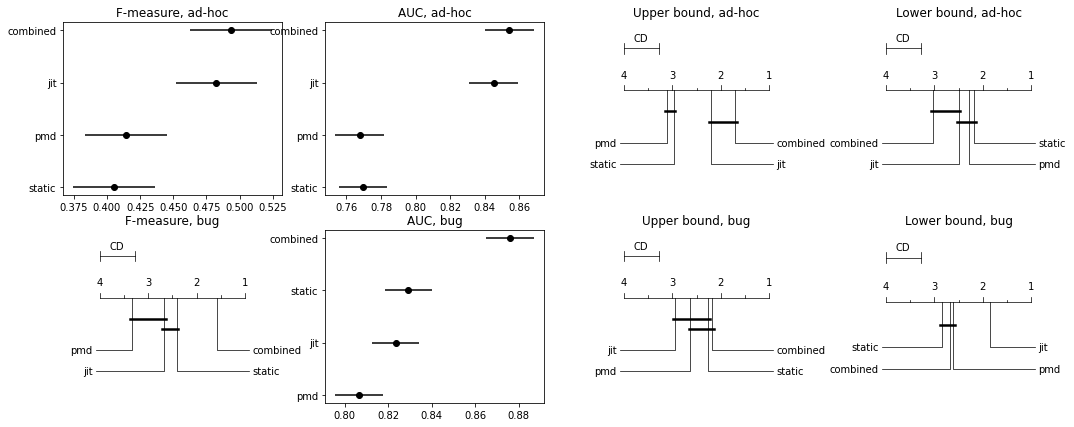

In [15]:
r = pd.read_csv('{}/train_test_all.csv'.format(DATA_PATH))
fig, axs = plt.subplots(2, 4, figsize=(18,7))

axx = 0
axy = 0
for lbl in ['adhoc_label', 'bug_label']:
    axy = 0
    for pm in ['f1', 'roc_auc', 'ub', 'lb']:
        populations = pd.DataFrame()
        for ms in ['jit', 'static', 'pmd', 'jit_static_pmd']:
            name = ms
            if name == 'jit_static_pmd':
                name = 'combined'
            populations[name] = np.concatenate((r[(r['label'] == lbl) & (r['metric_set'] == ms)]['rf_{}'.format(pm)].values, r[(r['label'] == lbl) & (r['metric_set'] == ms)]['lr_{}'.format(pm)].values))

        result = autorank(populations, alpha=0.003125, verbose=False)
        plot_stats(result, ax=axs[axx, axy])
        

        if lbl == 'adhoc_label':
            lbl_name = 'ad-hoc'
        if lbl == 'bug_label':
            lbl_name = 'bug'
        if pm == 'f1':
            pm_name = 'F-measure'
        if pm == 'roc_auc':
            pm_name = 'AUC'
        if pm == 'ub':
            pm_name = 'Upper bound'
        if pm == 'lb':
            pm_name = 'Lower bound'
        
        latex_table(result, label='tbl:stat_results_tt_{}_{}'.format(pm, lbl_name))
        axs[axx, axy].set_title('{}, {}'.format(pm_name, lbl_name))
        #plt.savefig(FIGURES_PATH + '/ar_interval_{}_{}.pdf'.format(lbl, pm))
        axy += 1
    axx += 1
plt.show()

# Autorank interval merge classifiers

\begin{table}[h]
\centering
\begin{tabular}{lrlllll}
\toprule
{} &    MR &   MED &   MAD &              CI & $\delta$ &   Magnitude \\
\midrule
combined & 2.160 & 0.350 & 0.229 &  [0.304, 0.400] &     0.000 &  negligible \\
static   & 2.400 & 0.333 & 0.225 &  [0.286, 0.382] &     0.018 &  negligible \\
jit      & 2.469 & 0.320 & 0.251 &  [0.276, 0.374] &     0.061 &  negligible \\
pmd      & 2.971 & 0.271 & 0.228 &  [0.231, 0.320] &     0.161 &       small \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results_interval_f1_ad-hoc}
\end{table}
\begin{table}[h]
\centering
\begin{tabular}{lrlllll}
\toprule
{} &    MR &   MED &   MAD &              CI & $\delta$ &   Magnitude \\
\midrule
combined & 2.030 & 0.707 & 0.120 &  [0.685, 0.733] &     0.000 &  negligible \\
jit      & 2.381 & 0.695 & 0.136 &  [0.662, 0.717] &     0.079 &  negligible \\
static   & 2.470 & 0.682 & 0.126 &  [0.657, 0.708] &     0.110 &  negligible \\
pmd      & 3.119 & 0.624 & 0.121 &  [

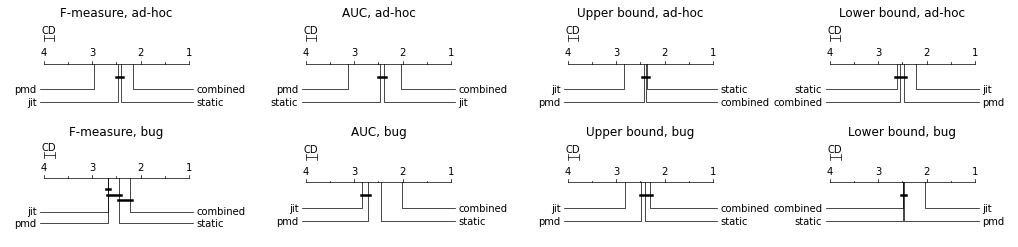

In [12]:
# load interval data data
scores = []
for project_name in PROJECTS:
    fname = '{}/interval_mean_{}.csv'.format(DATA_PATH, project_name)
    if os.path.exists(fname):
        scores.append(pd.read_csv(fname))

r = pd.concat(scores)

fig, axs = plt.subplots(2, 4, figsize=(18,4))

axx = 0
axy = 0
for lbl in ['label_adhoc', 'label_bug']:
    axy = 0
    for pm in ['f1', 'roc_auc', 'ub', 'lb']:
        populations = pd.DataFrame()
        for ms in ['jit', 'static', 'pmd', 'jit_static_pmd']:
            name = ms
            if name == 'jit_static_pmd':
                name = 'combined'
            populations[name] = np.concatenate((r[(r['label'] == lbl) & (r['metric_set'] == ms)]['rf_{}'.format(pm)].values, r[(r['label'] == lbl) & (r['metric_set'] == ms)]['lr_{}'.format(pm)].values))

        result = autorank(populations, alpha=0.003125, verbose=False)
        plot_stats(result, ax=axs[axx, axy])
        

        if lbl == 'label_adhoc':
            lbl_name = 'ad-hoc'
        if lbl == 'label_bug':
            lbl_name = 'bug'
        if pm == 'f1':
            pm_name = 'F-measure'
        if pm == 'roc_auc':
            pm_name = 'AUC'
        if pm == 'ub':
            pm_name = 'Upper bound'
        if pm == 'lb':
            pm_name = 'Lower bound'
        
        latex_table(result, label='tbl:stat_results_interval_{}_{}'.format(pm, lbl_name))
        axs[axx, axy].set_title('{}, {}'.format(pm_name, lbl_name))
        #plt.savefig(FIGURES_PATH + '/ar_interval_{}_{}.pdf'.format(lbl, pm))
        axy += 1
    axx += 1
plt.show()